In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline (if using Jupyter)
%matplotlib inline

# TODO: change filename if yours is different
file_path = "../data/raw/Walmart.csv"

df = pd.read_csv(file_path)
print("Raw shape:", df.shape)
df.head()

Raw shape: (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("Bad dates (NaT):", df['Date'].isna().sum())

df = df.dropna(subset=['Date'])
df = df.sort_values('Date')

df[['Date']].head()

Bad dates (NaT): 3870


,Date
177,2010-01-10
1178,2010-01-10
3037,2010-01-10
1893,2010-01-10
4181,2010-01-10


In [5]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

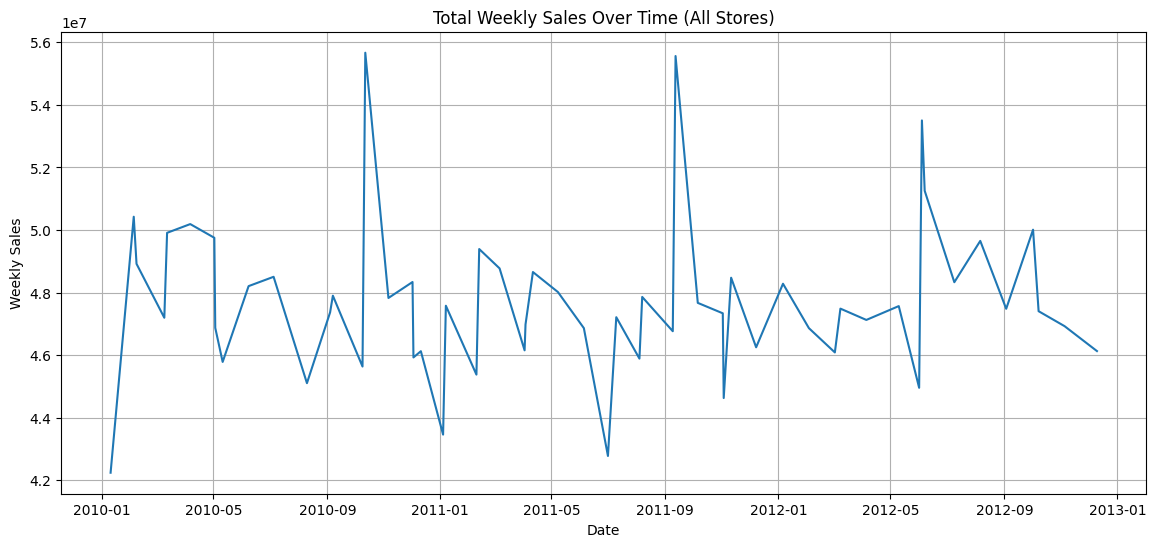

In [6]:
plt.figure(figsize=(14, 6))
df_group = df.groupby('Date', as_index=False)['Weekly_Sales'].sum()

sns.lineplot(data=df_group, x='Date', y='Weekly_Sales')
plt.title("Total Weekly Sales Over Time (All Stores)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

In [7]:
print("Number of unique stores:", df['Store'].nunique())

store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
store_sales

Number of unique stores: 45


Store
20    1.236541e+08
4     1.190478e+08
14    1.182858e+08
13    1.138956e+08
2     1.112614e+08
10    1.085998e+08
27    1.016186e+08
1     9.130517e+07
6     9.056853e+07
19    8.371544e+07
Name: Weekly_Sales, dtype: float64

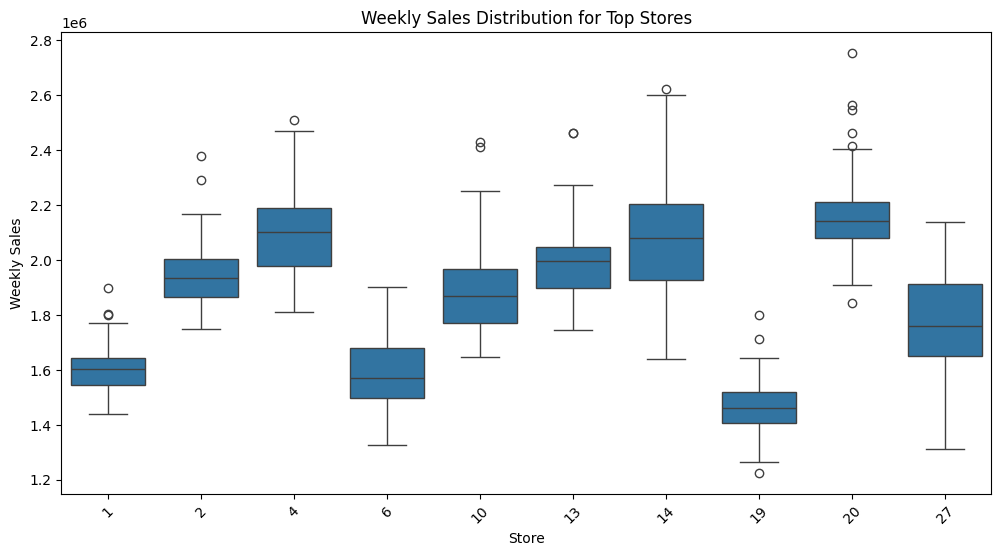

In [8]:
top_stores = store_sales.index.tolist()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Store'].isin(top_stores)], x='Store', y='Weekly_Sales')
plt.title("Weekly Sales Distribution for Top Stores")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.show()

In [9]:
df.to_csv("../data/processed/walmart_clean_base.csv", index=False)
print("Saved cleaned base file:", "../data/processed/walmart_clean_base.csv")
print("Final shape:", df.shape)

Saved cleaned base file: ../data/processed/walmart_clean_base.csv
Final shape: (2565, 8)
